<p style="text-align: center;font-size:50px">
 Lab 9: Manejo de señales EMG
</p>

#### **Tabla de Contenido**

1. [Introducción](#introduccion)
2. [Objetivos](#objetivos)
3. [Materiales](#materiales)
4. [Procedimiento](#procedimiento)
5. [Resultados](#resultados)
6. [Discusión](#discusion)
7. [Conclusiones](#conclusiones)
8. [Bibliografía](#bibliografia)

## Introducción
La electromiografía de superficie (sEMG) es una técnica no invasiva utilizada para registrar la actividad eléctrica generada por los músculos esqueléticos durante la contracción muscular. Esta señal contiene información valiosa sobre la activación muscular y es ampliamente utilizada en aplicaciones clínicas, de ingeniería e investigación. La sEMG se obtiene mediante la colocación de electrodos en la superficie de la piel sobre el músculo de interés, permitiendo registrar el potencial de acción de la unidad motora (MUAP) sin la necesidad de penetrar la piel. [1]

A pesar de su utilidad, la señal EMG es muy sensible a diversas fuentes de ruido y artefactos, que pueden comprometer la calidad de la información obtenida. Estas fuentes de ruido se pueden clasificar en cinco categorías principales [1]:
1. Ruido inherente: Originado en los componentes electrónicos del equipo de medición y está presente en todo dispositivo electrónico.
2. Ruido ambiental: Proviene de la radiación electromagnética en el entorno.
3. Artefacto de movimiento: Resulta del movimiento de los cables que conectan los electrodos con el sistema de adquisición de datos.
4. Diafonía: Es el resultado de la activación involuntaria de músculos cercanos al músculo de interés.
5. Ruido interno: Asociado a la estructura interna del cuerpo humano. Elementos como el grosor del tejido adiposo, la profundidad de la fibra muscular y la ubicación del músculo influyen en la calidad de la señal registrada.

Para obtener una señal EMG útil y precisa, es fundamental realizar un procesamiento adecuado. En primer lugar, en la etapa de filtrado, se eliminan los componentes de ruido que afectan a la señal EMG bruta. Mediante el uso de filtros bien diseñados, se mejora la relación señal-ruido para obtener una señal lo más limpia posible. En segundo lugar, se lleva a cabo el preprocesamiento, donde la señal se normaliza y alinea. Esto implica segmentarla en ventanas de tiempo específicas y normalizarla usando valores de referencia, como los obtenidos de la contracción máxima voluntaria (MVC). Finalmente, en la etapa de extracción de características, se obtienen parámetros clave de la señal EMG que representan su información esencial. Estas características seleccionadas son fundamentales para aplicaciones clínicas y de análisis, permitiendo una interpretación más precisa de la actividad muscular.

Según el paper *EMG-Based Feature Extraction and Classification for Prosthetic Hand Control*, se considera que los parámetros relevantes para la señal de EMG son los siguientes [2]:
- *Integrated EMG (IEMG)*: Es la suma absoluta de los valores absolutos de la señal EMG y representa la energía total de la señal.
- *Mean Absolute Value (MAV)*: Es el valor medio absoluto de la señal EMG y representa la intensidad promedio de la actividad muscular.
- *Simple Square Integrated (SSI)*: Es la suma de los cuadrados de cada punto de la señal y amplifica los valores altos de la señal, lo que ayuda a medir la energía total.
- *Root Mean Square (RMS)*: Es la raíz cuadrada de la media de los cuadrados de la señal y representa una medida de la potencia de la señal EMG.
- *Variance (VAR)*: Es la medida de la dispersión de la señal y permite evaluar las variaciones en la amplitud.
- *Myopulse Percentage Rate (MYOP)*: Es la medida de la proporción del tiempo en que la señal supera un umbral (T) específico, lo que ayuda a determinar la frecuencia de activación muscular.
- *Waveform Length (WL)*: Es la longitud total de la forma de onda de la señal.
- *Difference Absolute Mean Value (DAMV)*: Es el valor medio absoluto de las diferencias entre puntos consecutivos de la señal, lo que indica cambios rápidos en la señal.
- *Second-Order Moment (M2)*: Es el valor del segundo momento de la señal y se relaciona con la energía de la señal.
- *Difference Variance Version (DVARV)*: Es la varianza de las diferencias entre puntos consecutivos de la señal.
- *Difference Absolute Standard Deviation Value (DASDV)*: Es la desviación estándar de las diferencias absolutas entre puntos consecutivos.
- *Willison Amplitude (WAMP)*: Es el contador del número de veces que la diferencia entre puntos consecutivos de la señal supera un umbral (T).

<div align="center">
   <img src="./imagenes/tabla_parametros.png" alt="Derivaciones" width="800">

**Figura 1: Parámetros relevantes de la señal EMG**  
</div>
<br>

## Objetivos
- Diseñar un filtro adecuado para las señaled EMG
- Extraer y discutir las características de las señales EMG

## Materiales
| Material | Cantidad |
|:--------------:|:--------------:|
| Programa *Python* | N.A | 

## Procedimiento

### 1. Selección de las señales a analizar

En el laboratorio 4 del curso de *Introducción a Señales Biomédicas*, se adquirieron señales de EMG superficial utilizando el dispositivo BITalino. Las señales musculares registradas incluyen:

- Bíceps
- Tríceps
- Gastrocnemio (pantorrilla)

Cada una de estas señales consta de tres fases bien definidas:
- Fase de reposo (basal): Se da al inicio de la señal, durante los primeros segundos.
- Fase de contracción simple: Se da a la mitad de la señal. Esta representa la contracción muscular voluntaria sin carga externa en oposición.
- Fase de contracción progresiva: Aquí la tensión en el músculo se incrementa de manera gradual debido a la presencia de una carga externa. Esta fase se da al final de la señal y reprenta visualmente los picos más altos de activación.

Para este análisis, se seleccionaron tres señales: una del bíceps, otra del tríceps y una del gastrocnemio.

### 2. Procesamiento de la señal

Para las tres señales, en primera instancia se aplico un filtrado. Este filtrado se hizo en base a la transformada wavelet. El filtro implementado esta basado en el paper *Wavelet Transform Theory and its Application in EMG Signal Processing* [A1], del cual obtuvimos los siguientes parámetros de diseño.

* Wavelet madre: Daubechies 6 (db6)
* Niveles de descomposición: 4
* Umbral: Se uso la umbralización de tipo *soft*. Además, los umbrales usados en el paper de referencia fueron aplicados a los coeficientes de detalle y fueron distintos para cada nivel de descomposición. En ese sentido, los umbrales fueron los siguientes: 0.022 (nivel 4), 0.109 (nivel 3), 0.303 (nivel 2), 0.742 (nivel 1).

El usar una umbralización *soft* en lugar de *hard* ofrece ciertas ventajas que son relevantes para bioseñales. Recordemos que tanto la umbralización *soft* como *hard* vuelven cero los coeficientes que se encuentren por debajo del valor umbral. No obstante, la diferencia radica en lo que hacen con los coeficientes que estan por encima. La umbralización *hard* los deja intactos, por lo que los nuevos valores de los coeficientes se prestan para que haya saltos bruscos y repentinos debido a los ceros presentes. En cambio, la umbralización *soft* suaviza las transiciones, restando a los coeficientes que esten por encima del umbral el valor del umbral, es decir, sea λ el umbral y α un coeficiente por encima del umbral: el nuevo coeficiente que reemplace a α sería α - λ. Esto, como se mencione antes, resulta en transiciones mucho más suaves al igual que en la eliminación de discontinuidades, preservando así en mayor medida la integridad y forma de la señal. Esto en el caso de bioseñales como EMG es importante, ya que varias de sus características dependen de la morfología de la señal muscular.

Los códigos implementados para el filtrado via wavelet se encuentran en el apartado de *Anexos*. En particular, se destaca la implementación de las funciones:

* **wavelet_denoising(signal, wavelet, level, thresholds):** Función que permite realizar el filtrado. Recibe las variables *signal*, *wavelet*, *level* y *thresholds*. Estas representan que la señal a filtrar, el nombre del wavelet madre, los niveles de descomposición y los valores umbrales respectivamente.
* **soft_threshold(coeff, threshold):** Es una función auxiliar de *wavelet_denoising* que permite realizar la umbralización *soft*. Recibe las variables *coeff* y *threshold*, que son los coeficientes obtenidos tras la descomposición, y los umbrales respectivamente. 

Una vez obtenida la señal filtrada, el siguiente paso a realizar fue la normalización de la misma.

### 3. Normalización de la señal

Tras revisar la literatura, se encontraron diversos métodos de normalización, entre los cuales destaca el estudio (DOI: 10.1515/hukin-2015-0030) que menciona las siguientes estrategias:

- **Isokinetic (IMVC)**: El promedio conjunto del pico de activación muscular en cada músculo.
- **Mean Dynamic Activity (MDA)**: El promedio conjunto de la activación muscular durante el ciclo dinámico.
- **Peak Dynamic Activity (PDA)**: El promedio conjunto del pico de activación durante el ciclo dinámico.

De estos métodos, se seleccionó el **IMVC** para normalizar las señales. El proceso consistió en obtener el valor máximo de la señal procesada (filtrada y en términos de voltaje), y luego dividir toda la señal procesada entre el valor máximo (IMVC), obteniendo así la señal normalizada:

$$
\frac{\text{Señal procesada}}{\text{IMVC}}
$$

### 4. Parámetros o características extraídas

Se seleccionaron los siguientes parámetros o características según el paper *EMG-Based Feature Extraction and Classification for Prosthetic Hand Control* [A2]:

1. **Mean Absolute Value (MAV)**: Es una medida del promedio absoluto de la señal, útil para evaluar y cuantificar la actividad muscular en general.

   $$
   \text{MAV} = \frac{1}{N} \sum_{n=1}^{N} |x[n]|
   $$

2. **Root Mean Square (RMS)**: Una medida de la magnitud de la señal EMG, que proporciona una estimación de la fuerza generada por el músculo.

   $$
   \text{RMS} = \sqrt{\frac{1}{N} \sum_{n=1}^{N} x[n]^2}
   $$

3. **Myopulse Percentage Rate (MYOP)**: Mide el porcentaje de tiempo en que la señal EMG supera un umbral determinado. Un MYOP elevado implica entonces que el músculo se encuentra activo durante gran parte de la duración de la señal, implicando así un contracción prolongada y/o frecuente.

   $$
   \text{MYOP} = \frac{1}{N} \sum_{n=1}^{N} f(|x[n]|), \quad f(a) = 
   \begin{cases} 
   1 & \text{si } a > T \\ 
   0 & \text{en caso contrario} 
   \end{cases}
   $$

4. **Waveform Length (WL)**: Suma de las diferencias absolutas entre puntos consecutivos de la señal, que indica la complejidad de la misma.

   $$
   \text{WL} = \sum_{n=1}^{N-1} |x[n+1] - x[n]|
   $$

5. **Varianza (VAR)**: Proporciona una medida de la dispersión de la señal EMG.

   $$
   \text{VAR} = \frac{1}{N-1} \sum_{n=1}^{N} x[n]^2
   $$

<div align="center">

  ![Descripción de la imagen](imagenes/tabla_parametros.png)

</div>
<p align="justify">
Para la aplicación de los parámetros mencionados, se trabajó con la señal ya procesada, es decir, después de haber sido filtrada y normalizada. Además, se aplicó un ventaneo, lo que significa que los parámetros se calcularon únicamente en las partes de la señal donde hubo activación muscular, excluyendo los momentos de reposo o espera.

El ventaneo se refiere a seleccionar las secciones de la señal en las que el músculo se encuentra en un estado de interés, por lo que los parámetros se obtuvieron solo sobre los fragmentos de la señal que reflejaban el tipo de actividad muscular que se deseaba analizar. De esta forma, se asegura que las características como MAV, RMS, MYOP, entre otras, representen de manera precisa la actividad muscular en los momentos de interés.
</p>
 

## Resultados 

### **1.Biceps**


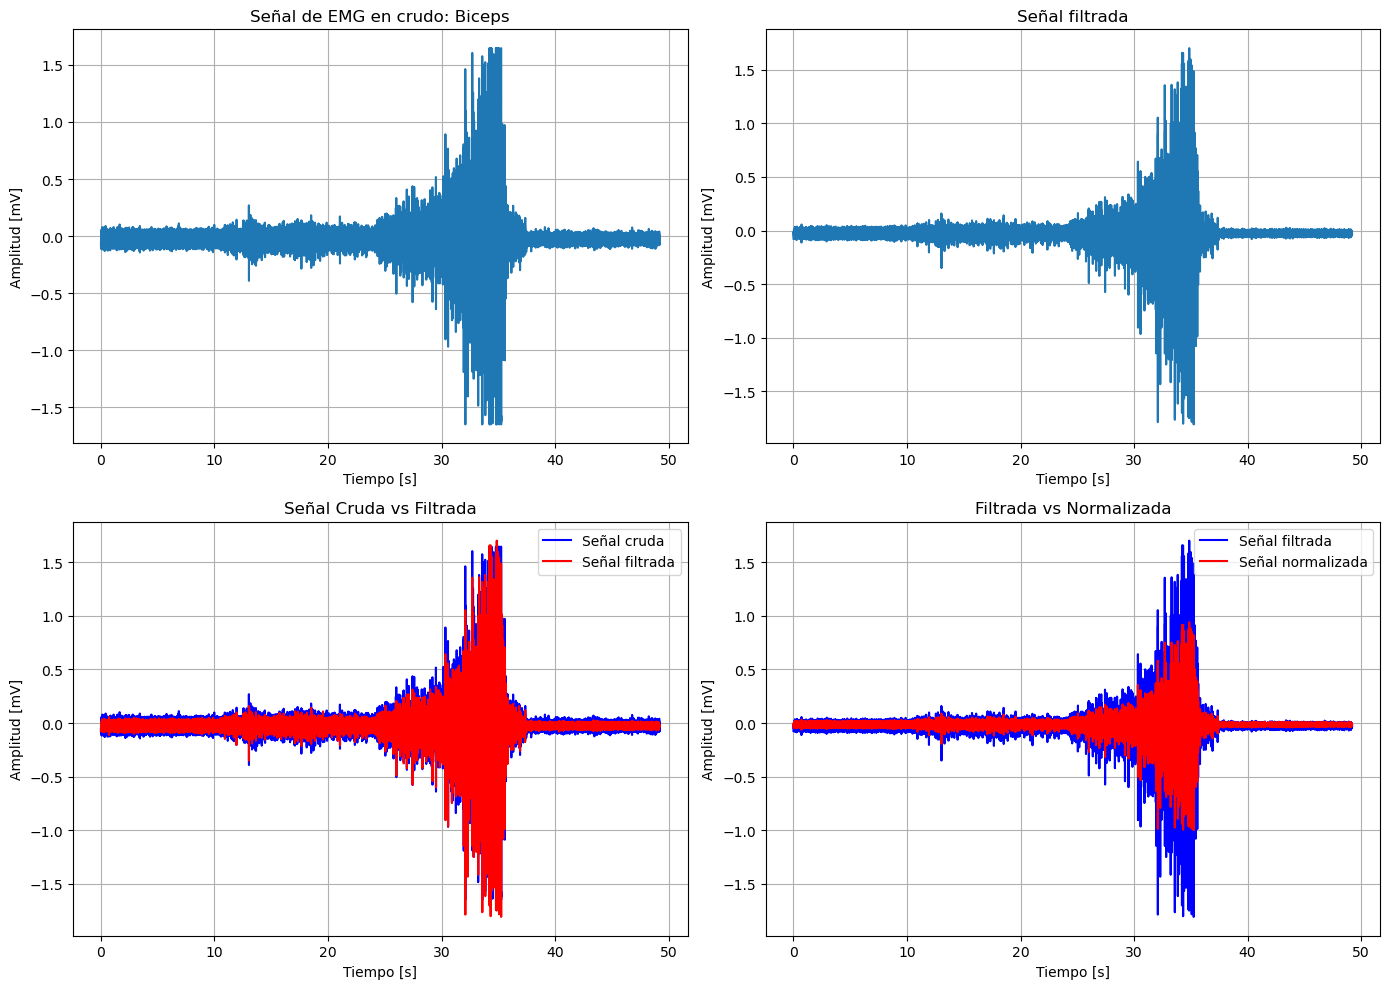

In [9]:
# Cargar los datos y procesarlos
sample, amplitude = extraer_datos("Biceps.txt")
amplitude = EmgToVoltage(amplitude) * 1000

# Filtrado mediante Wavelet
wavelet = 'db6'
level = 4
threshold = [0.022, 0.109, 0.303, 0.742]
filtered_signal = wavelet_denoising(amplitude, wavelet, level, threshold)

# Normalización de la señal filtrada
imvc = np.max(np.abs(filtered_signal))
normalized_signal = filtered_signal / imvc

# Graficar en un formato de 2x2
plt.figure(figsize=(14, 10))

# Primera gráfica - Señal EMG en crudo
plt.subplot(2, 2, 1)
plt.plot(sample / 1000, amplitude)
plt.title('Señal de EMG en crudo: Biceps')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [mV]')
plt.grid(True)

# Segunda gráfica - Señal filtrada
plt.subplot(2, 2, 2)
plt.plot(sample / 1000, filtered_signal)
plt.title('Señal filtrada')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [mV]')
plt.grid(True)

# Tercera gráfica - Señal cruda vs filtrada
plt.subplot(2, 2, 3)
plt.plot(sample / 1000, amplitude, label='Señal cruda', color='b')
plt.plot(sample / 1000, filtered_signal, label='Señal filtrada', color='r')
plt.title('Señal Cruda vs Filtrada')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [mV]')
plt.legend()
plt.grid(True)

# Cuarta gráfica - Señal filtrada vs normalizada
plt.subplot(2, 2, 4)
plt.plot(sample / 1000, filtered_signal, label='Señal filtrada', color='b')
plt.plot(sample / 1000, normalized_signal, label='Señal normalizada', color='r')
plt.title('Filtrada vs Normalizada')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [mV]')
plt.legend()
plt.grid(True)

# Ajustar el layout para evitar solapamiento
plt.tight_layout()

# Mostrar todas las gráficas
plt.show()

##### **Ventaneo biceps** 

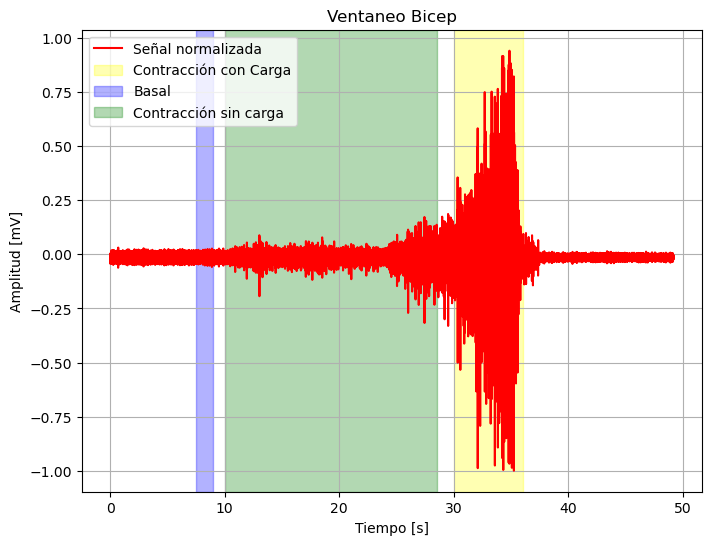

Características para la Bicep - Basal:
El Mean Absolute Value de la señal Bicep: 0.018
El RMS de la señal Bicep: 0.022
El Myopulse Percentage Rate de la señal bicep (%): 0.0
El waveform length de la señal Bicep: 7.507
La varianza de la señal Bicep 0.0
--------------------------------------------------
Características para la Bicep - Contracción sin carga:
El Mean Absolute Value de la señal Bicep: 0.026
El RMS de la señal Bicep: 0.035
El Myopulse Percentage Rate de la señal bicep (%): 0.011
El waveform length de la señal Bicep: 150.343
La varianza de la señal Bicep 0.001
--------------------------------------------------
Características para la Bicep - Contracción con carga:
El Mean Absolute Value de la señal Bicep: 0.156
El RMS de la señal Bicep: 0.23
El Myopulse Percentage Rate de la señal bicep (%): 14.683
El waveform length de la señal Bicep: 325.444
La varianza de la señal Bicep 0.053
--------------------------------------------------


In [18]:
plt.figure(figsize=(8, 6))

# Graficar la señal normalizada en el rango [22000:38000]
plt.plot((sample / 1000), normalized_signal, label='Señal normalizada', color='r')

# Añadir el cuadro para el ventaneo entre 28000 y 35000 (sombrea esa región)
plt.axvspan(30000 / 1000, 36000 / 1000, color='yellow', alpha=0.3, label='Contracción con Carga')
plt.axvspan(7500 / 1000, 9000 / 1000, color='blue', alpha=0.3, label='Basal')
plt.axvspan(10000 / 1000, 28500 / 1000, color='green', alpha=0.3, label='Contracción sin carga')

# Configurar el título, etiquetas y leyenda
plt.title('Ventaneo Bicep')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [mV]')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()

ventanas = [(7500, 9000), (10000, 28500) ,(30000, 36000)]
names=["Basal","Contracción sin carga", "Contracción con carga"]
for i, (start, end) in enumerate(ventanas):
    # Asegurarse de dividir correctamente las señales en las ventanas
    MAV, RMS, WL, WAMP, MYOP, VAR = extract_features(filtered_signal[start:end] / imvc)
    if i==0:
         d31,d32,d33,d34,d35,d36=MAV, RMS, WL, WAMP, MYOP, VAR
    if i == 1:
         b1, b2, b3, b4, b5 = MAV, RMS, WL, MYOP, VAR
    # Imprimir las características para cada ventana
    print(f"Características para la Bicep - {names[i]}:")
    print("El Mean Absolute Value de la señal Bicep:", round(MAV, 3))
    print("El RMS de la señal Bicep:", round(RMS, 3))
    print("El Myopulse Percentage Rate de la señal bicep (%):", round(MYOP, 3))
    print("El waveform length de la señal Bicep:", round(WL, 3))
    print("La varianza de la señal Bicep", round(VAR, 3))
    print("-" * 50)

### **2. Pantorrilla**

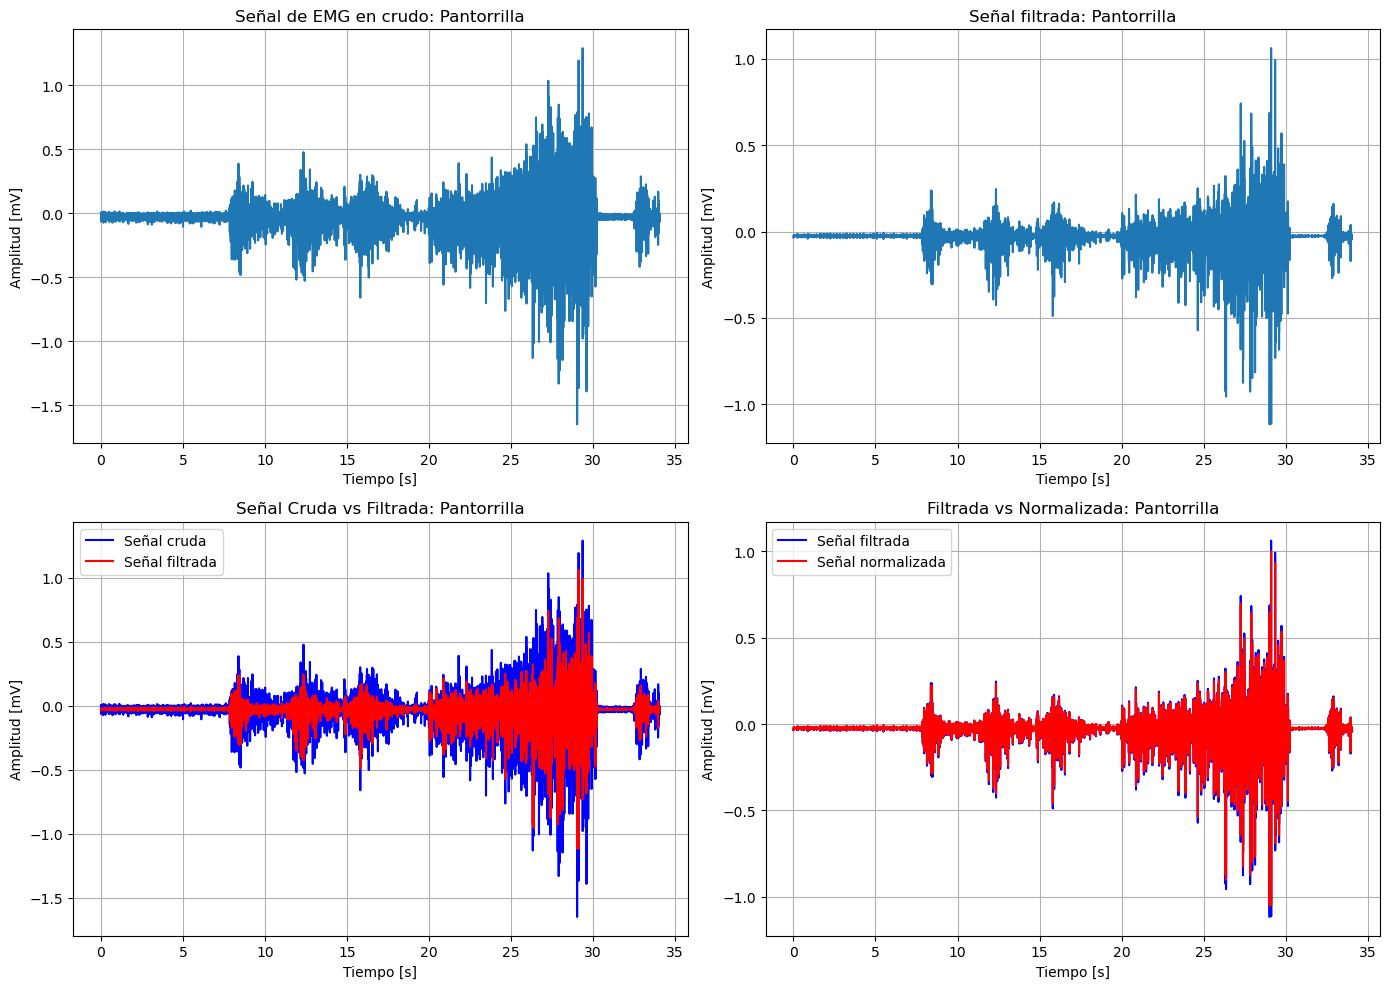

In [81]:
# Cargar los datos y procesarlos para Pantorrilla
sample_pantorrilla, amplitude_pantorrilla = extraer_datos("Pantorrilla.txt")
amplitude_pantorrilla = EmgToVoltage(amplitude_pantorrilla) * 1000

# Filtrado mediante Wavelet para Pantorrilla
wavelet = 'db6'
level = 4
threshold = [0.022, 0.109, 0.303, 0.742]
filtered_signal_pantorrilla = wavelet_denoising(amplitude_pantorrilla, wavelet, level, threshold)

# Normalización de la señal filtrada para Pantorrilla
imvc_pantorrilla = np.max(filtered_signal_pantorrilla)
normalized_signal_pantorrilla = filtered_signal_pantorrilla / imvc_pantorrilla

# Graficar en un formato de 2x2 para Pantorrilla
plt.figure(figsize=(14, 10))

# Primera gráfica - Señal EMG en crudo
plt.subplot(2, 2, 1)
plt.plot(sample_pantorrilla / 1000, amplitude_pantorrilla)
plt.title('Señal de EMG en crudo: Pantorrilla')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [mV]')
plt.grid(True)

# Segunda gráfica - Señal filtrada
plt.subplot(2, 2, 2)
plt.plot(sample_pantorrilla / 1000, filtered_signal_pantorrilla)
plt.title('Señal filtrada: Pantorrilla')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [mV]')
plt.grid(True)

# Tercera gráfica - Señal cruda vs filtrada
plt.subplot(2, 2, 3)
plt.plot(sample_pantorrilla / 1000, amplitude_pantorrilla, label='Señal cruda', color='b')
plt.plot(sample_pantorrilla / 1000, filtered_signal_pantorrilla, label='Señal filtrada', color='r')
plt.title('Señal Cruda vs Filtrada: Pantorrilla')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [mV]')
plt.legend()
plt.grid(True)

# Cuarta gráfica - Señal filtrada vs normalizada
plt.subplot(2, 2, 4)
plt.plot(sample_pantorrilla / 1000, filtered_signal_pantorrilla, label='Señal filtrada', color='b')
plt.plot(sample_pantorrilla / 1000, normalized_signal_pantorrilla, label='Señal normalizada', color='r')
plt.title('Filtrada vs Normalizada: Pantorrilla')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [mV]')
plt.legend()
plt.grid(True)

# Ajustar el layout para evitar solapamiento
plt.tight_layout()

# Mostrar todas las gráficas
plt.show()

##### **Ventaneo  pantorrilla** 

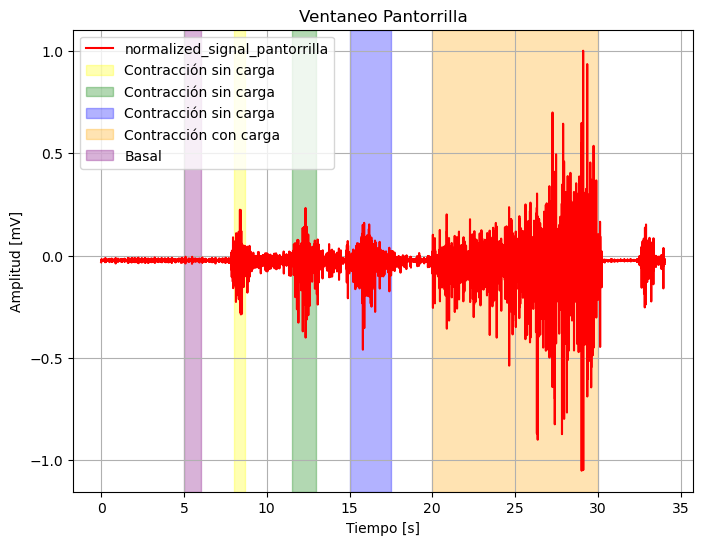

In [82]:
plt.figure(figsize=(8, 6))

# Graficar la señal normalizada completa
plt.plot(np.arange(len(normalized_signal_pantorrilla)) / 1000, normalized_signal_pantorrilla, label='normalized_signal_pantorrilla', color='r')

# Añadir los cuadros para el ventaneo
plt.axvspan(8000 / 1000, 8700 / 1000, color='yellow', alpha=0.3, label='Contracción sin carga')
plt.axvspan(11500 / 1000, 13000 / 1000, color='green', alpha=0.3, label='Contracción sin carga')
plt.axvspan(15000 / 1000, 17500 / 1000, color='blue', alpha=0.3, label='Contracción sin carga')
plt.axvspan(20000 / 1000, 30000 / 1000, color='orange', alpha=0.3, label='Contracción con carga')
plt.axvspan(5000 / 1000, 6000 / 1000, color='purple', alpha=0.3, label='Basal')
# Configurar el título, etiquetas y leyenda
plt.title('Ventaneo Pantorrilla')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [mV]')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()


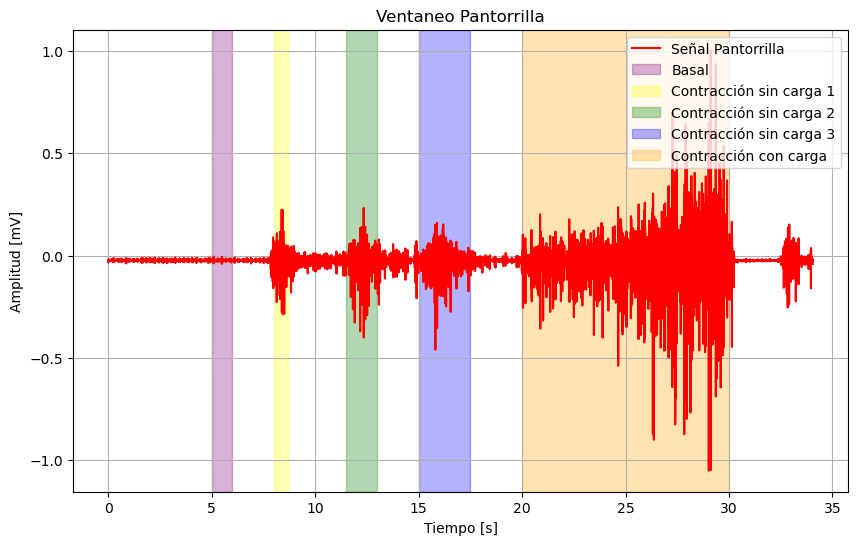

Características para la ventana Basal:
El Mean Absolute Value de la señal Pantorrilla: 0.024
El RMS de la señal Pantorrilla: 0.024
El Myopulse Percentage Rate de la señal Pantorrilla (%): 0.0
El waveform length de la señal Pantorrilla: 0.904
La varianza de la señal Pantorrilla: 0.0
--------------------------------------------------
Características para la ventana Contracción sin carga 1:
El Mean Absolute Value de la señal Pantorrilla: 0.053
El RMS de la señal Pantorrilla: 0.075
El Myopulse Percentage Rate de la señal Pantorrilla (%): 0.0
El waveform length de la señal Pantorrilla: 11.978
La varianza de la señal Pantorrilla: 0.005
--------------------------------------------------
Características para la ventana Contracción sin carga 2:
El Mean Absolute Value de la señal Pantorrilla: 0.044
El RMS de la señal Pantorrilla: 0.066
El Myopulse Percentage Rate de la señal Pantorrilla (%): 0.6
El waveform length de la señal Pantorrilla: 22.751
La varianza de la señal Pantorrilla: 0.004
-------

In [83]:
ventanas = [(5000,6000),(8000, 8700), (11500, 13000), (15000, 17500), (20000, 30000)]
colores = ["purple",'yellow', 'green', 'blue', 'orange']
etiquetas = ["Basal",'Contracción sin carga 1', 'Contracción sin carga 2', 'Contracción sin carga 3', 'Contracción con carga']
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(normalized_signal_pantorrilla)) / 1000, normalized_signal_pantorrilla, label='Señal Pantorrilla', color='r')

# Añadir los cuadros para el ventaneo
for i, (start, end) in enumerate(ventanas):
    plt.axvspan(start / 1000, end / 1000, color=colores[i], alpha=0.3, label=etiquetas[i])

# Añadir una ventana basal adicional


# Configurar el título, etiquetas y leyenda
plt.title('Ventaneo Pantorrilla')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [mV]')
plt.legend(loc='upper right')
plt.grid(True)

# Mostrar la gráfica
plt.show()

# Extraer características para cada ventana y luego imprimir los resultados
for i, (start, end) in enumerate(ventanas):
    MAV, RMS, WL, WAMP, MYOP, VAR = extract_features(normalized_signal_pantorrilla[start:end])
    if i==0:
         r31,r32,r33,r34,r35,r36=MAV, RMS, WL, WAMP, MYOP, VAR
    # Imprimir las características utilizando las etiquetas descriptivas
    if i == 4:
        p1, p2, p3, p4, p5 = MAV, RMS, WL, MYOP, VAR
    print(f"Características para la ventana {etiquetas[i]}:")
    print("El Mean Absolute Value de la señal Pantorrilla:", round(MAV, 3))
    print("El RMS de la señal Pantorrilla:", round(RMS, 3))
    print("El Myopulse Percentage Rate de la señal Pantorrilla (%):", round(MYOP, 3))
    print("El waveform length de la señal Pantorrilla:", round(WL, 3))
    print("La varianza de la señal Pantorrilla:", round(VAR, 3))
    print("-" * 50)  # Separador entre ventanas

### **3.Tricep**

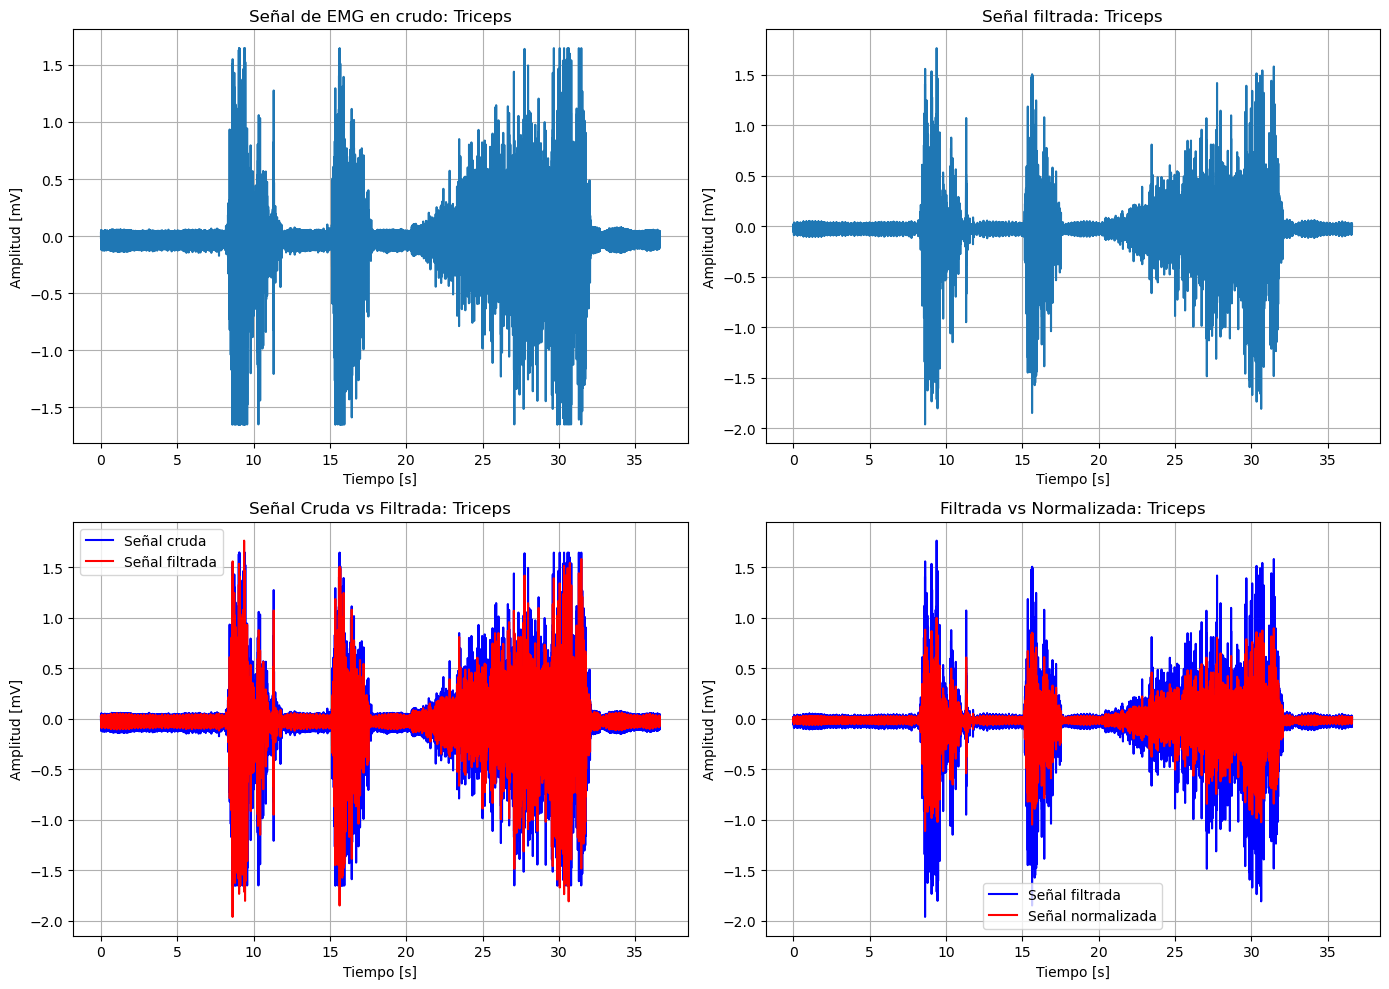

In [84]:
# Cargar los datos y procesarlos para Triceps
sample_triceps, amplitude_triceps = extraer_datos("Triceps.txt")
amplitude_triceps = EmgToVoltage(amplitude_triceps) * 1000

# Filtrado mediante Wavelet para Triceps
wavelet = 'db6'
level = 4
threshold = [0.022, 0.109, 0.303, 0.742]
filtered_signal_triceps = wavelet_denoising(amplitude_triceps, wavelet, level, threshold)

# Normalización de la señal filtrada para Triceps
imvc_triceps = np.max(filtered_signal_triceps)
normalized_signal_triceps = filtered_signal_triceps / imvc_triceps

# Graficar en un formato de 2x2 para Triceps
plt.figure(figsize=(14, 10))

# Primera gráfica - Señal EMG en crudo
plt.subplot(2, 2, 1)
plt.plot(sample_triceps / 1000, amplitude_triceps)
plt.title('Señal de EMG en crudo: Triceps')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [mV]')
plt.grid(True)

# Segunda gráfica - Señal filtrada
plt.subplot(2, 2, 2)
plt.plot(sample_triceps / 1000, filtered_signal_triceps)
plt.title('Señal filtrada: Triceps')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [mV]')
plt.grid(True)

# Tercera gráfica - Señal cruda vs filtrada
plt.subplot(2, 2, 3)
plt.plot(sample_triceps / 1000, amplitude_triceps, label='Señal cruda', color='b')
plt.plot(sample_triceps / 1000, filtered_signal_triceps, label='Señal filtrada', color='r')
plt.title('Señal Cruda vs Filtrada: Triceps')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [mV]')
plt.legend()
plt.grid(True)

# Cuarta gráfica - Señal filtrada vs normalizada
plt.subplot(2, 2, 4)
plt.plot(sample_triceps / 1000, filtered_signal_triceps, label='Señal filtrada', color='b')
plt.plot(sample_triceps / 1000, normalized_signal_triceps, label='Señal normalizada', color='r')
plt.title('Filtrada vs Normalizada: Triceps')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [mV]')
plt.legend()
plt.grid(True)

# Ajustar el layout para evitar solapamiento
plt.tight_layout()

# Mostrar todas las gráficas
plt.show()

##### **Ventaneo triceps** 

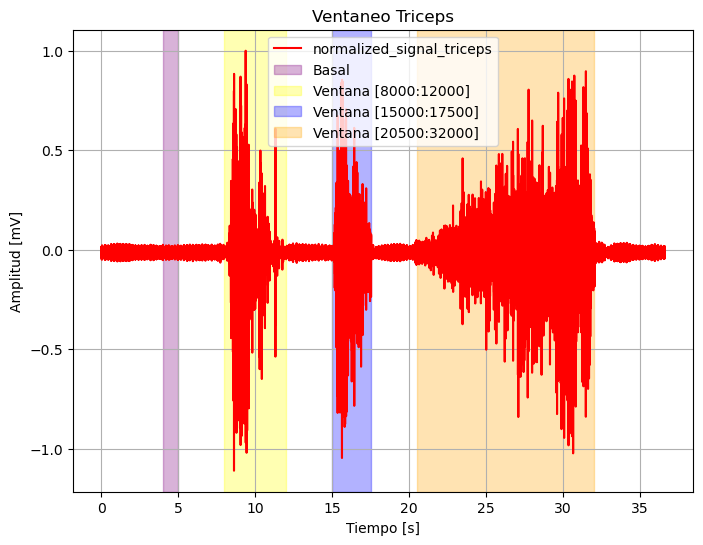

Características para la ventana [4000:5000]:
El Mean Absolute Value de la señal Triceps: 0.019
El RMS de la señal Triceps: 0.023
El Myopulse Percentage Rate de la señal Triceps (%): 0.0
El waveform length de la señal Triceps: 5.708
La varianza de la señal Triceps: 0.0
--------------------------------------------------
Características para la ventana [8000:12000]:
El Mean Absolute Value de la señal Triceps: 0.103
El RMS de la señal Triceps: 0.183
El Myopulse Percentage Rate de la señal Triceps (%): 9.1
El waveform length de la señal Triceps: 261.391
La varianza de la señal Triceps: 0.033
--------------------------------------------------
Características para la ventana [15000:17500]:
El Mean Absolute Value de la señal Triceps: 0.118
El RMS de la señal Triceps: 0.183
El Myopulse Percentage Rate de la señal Triceps (%): 8.84
El waveform length de la señal Triceps: 200.384
La varianza de la señal Triceps: 0.033
--------------------------------------------------
Características para la vent

In [85]:
plt.figure(figsize=(8, 6))

# Graficar la señal normalizada completa
plt.plot(np.arange(len(normalized_signal_triceps)) / 1000, normalized_signal_triceps, label='normalized_signal_triceps', color='r')

# Añadir los cuadros para el ventaneo
plt.axvspan(4000 / 1000, 5000 / 1000, color='purple', alpha=0.3, label='Basal')
plt.axvspan(8000 / 1000, 12000 / 1000, color='yellow', alpha=0.3, label='Ventana [8000:12000]')
plt.axvspan(15000 / 1000, 17500 / 1000, color='blue', alpha=0.3, label='Ventana [15000:17500]')
plt.axvspan(20500 / 1000, 32000 / 1000, color='orange', alpha=0.3, label='Ventana [20500:32000]')

# Configurar el título, etiquetas y leyenda
plt.title('Ventaneo Triceps')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [mV]')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()

# Definir las ventanas de interés
ventanas_triceps = [(4000,5000),(8000, 12000), (15000, 17500), (20500, 32000)]

# Extraer características para cada ventana
for i, (start, end) in enumerate(ventanas_triceps):
    MAV, RMS, WL, WAMP, MYOP, VAR = extract_features(normalized_signal_triceps[start:end])
    if i == 0:
         h31,h32,h33,h34,h35,h36=MAV, RMS, WL, WAMP, MYOP, VAR
    if i == 3:
         t1, t2, t3, t4, t5 = MAV, RMS, WL, MYOP, VAR
    # Imprimir las características para cada ventana
    print(f"Características para la ventana [{start}:{end}]:")
    print("El Mean Absolute Value de la señal Triceps:", round(MAV, 3))
    print("El RMS de la señal Triceps:", round(RMS, 3))
    print("El Myopulse Percentage Rate de la señal Triceps (%):", round(MYOP, 3))
    print("El waveform length de la señal Triceps:", round(WL, 3))
    print("La varianza de la señal Triceps:", round(VAR, 3))
    print("-" * 50)  # Separador entre ventanas

## Discusión 

### **1. Basal** ###

In [86]:
df = pd.DataFrame({
    'MAV': [d31, r31, h31],
    'RMS': [d32, r32, h32],
    'WL': [d33, r33, h33],
    'MYOP(%)': [d35, r35, h35],
    'VAR': [d36, r36, h36]
}, index=['Bicep', 'Pantorrilla', 'Gastrocnemio'])

# Renombrar los índices para reflejar los músculos
df.index.name = 'ESTADO BASAL'

# Imprimir el DataFrame
print(df)

                   MAV       RMS        WL  MYOP(%)       VAR
ESTADO BASAL                                                 
Bicep         0.018105  0.021910  7.506989      0.0  0.000276
Pantorrilla   0.023600  0.023956  0.903864      0.0  0.000017
Gastrocnemio  0.019120  0.023255  5.708496      0.0  0.000331


<p align="justify">

- **MAV (Mean Absolute Value):** Indica la intensidad promedio del músculo. En la fase basal, los valores son muy similares, oscilando entre 0.019 y 0.023, lo que sugiere que no hay diferencias significativas en la activación muscular del bíceps, tríceps y pantorrilla, o si las hay, son mínimas.

- **RMS (Root Mean Square):** Está relacionado con la potencia de la actividad muscular. En la fase basal, los valores rondan los 0.023, mostrando poca variabilidad entre los músculos. Esto es esperado, ya que no hay contracciones activas.

- **WL (Waveform Length):** Refleja la complejidad de la señal muscular. Se observa que el gastrocnemio tiene un valor más alto, lo que puede indicar una mayor variabilidad o ajustes musculares finos. En contraste, la pantorrilla tiene el valor más bajo, lo que refleja una menor variabilidad.

- **MYOP (Myopulse Percentage Rate):** Evalúa la presencia de impulsos musculares. Los valores son 0 en la fase basal, lo que indica la ausencia de actividad muscular significativa en forma de pulsos o espasmos.

- **VAR (Varianza):** Mide la variabilidad de la señal. En general, los valores son bajos, lo que es esperado en la fase basal sin contracciones activas. La pantorrilla muestra la menor variabilidad, lo que sugiere una mayor estabilidad en su actividad durante el tiempo analizado.
</p>



### 2. Contracción sin carga ### 

In [87]:
import pandas as pd

ventanas_para_pantorrilla = [(8000, 8700), (11500, 13000), (15000, 17500)]
ventanas_para_triceps = [(8000, 12000), (15000, 17500)]

señal_pantorrilla = normalized_signal_pantorrilla
señal_triceps = normalized_signal_triceps

tabla_pantorrilla = obtener_tabla_características(ventanas_para_pantorrilla,señal_pantorrilla,"Pantorrilla",ventanas_por_filas =True)
tabla_tríceps = obtener_tabla_características(ventanas_para_triceps,señal_triceps,"Tríceps",ventanas_por_filas = True)

print(tabla_pantorrilla,"\n\n")
print(tabla_tríceps)

                      MAV       RMS         WL  MYOP(%)   VAR
Pantorrilla                                                  
Primera ventana  0.053383  0.075149  11.977967      0.0  0.00
Segunda ventana  0.044432  0.066385  22.750696      0.0  0.60
Tercera ventana  0.039571  0.057423  30.018991      0.0  0.28 


                      MAV       RMS          WL  MYOP(%)   VAR
Tríceps                                                       
Primera ventana  0.102891  0.182895  261.391076      0.0  9.10
Segunda ventana  0.117583  0.182770  200.384256      0.0  8.84


* **MAV:**  
* **RMS:**  
* **WL:**  
* **MYOP:**  
* **VAR:**  

Luego explico esto

In [88]:
#Función para obtener las características por músculo en una tabla
def obtener_tabla_características(ventanas_tuplas,señal_normalizada,nombre_músculo,ventanas_por_filas = True):
    diccionario_nombres = {1:"Primera ventana",
                       2:"Segunda ventana",
                       3:"Tercera ventana",
                       4:"Cuarta ventana",
                       5:"Quinta ventana",
                       6:"Sexta ventana",
                       7:"Séptima ventana",
                       8:"Octava ventana",
                       9:"Novena ventana",
                       10:"Décima ventana"}
    características = ["MAV","RMS","WL","MYOP(%)","VAR"]
    
    diccionario_temporal = {}

    
    #obtención de características
    for numero,(start, end) in enumerate(ventanas_tuplas,1):
        valores = extract_features(señal_normalizada[start:end])
        dic_carac_val = dict(zip(características,valores))
        diccionario_temporal[diccionario_nombres[numero]] = dic_carac_val
    
    if ventanas_por_filas:
        tabla = pd.DataFrame(diccionario_temporal).T
    else:
        tabla = pd.DataFrame(diccionario_temporal)
    tabla.index.name = nombre_músculo
    return tabla

### 3. Contraccion con carga ### 

In [89]:
df = pd.DataFrame({
    'MAV': [b1, p1, t1],
    'RMS': [b2, p2, t2],
    'WL': [b3, p3, t3],
    'MYOP(%)': [b4, p4, t4],
    'VAR': [b5, p5, t5]
}, index=['Biceps', 'Pantorrilla', 'Triceps'])

# Renombrar los índices para reflejar los músculos
df.index.name = 'CONTRACCION CON CARGA'

# Imprimir el DataFrame
print(df)

                            MAV       RMS          WL    MYOP(%)       VAR
CONTRACCION CON CARGA                                                     
Biceps                 0.130859  0.201943  359.981126  11.050000  0.040584
Pantorrilla            0.066717  0.106102  365.757656   2.190000  0.010670
Triceps                0.097478  0.147213  584.955742   5.313043  0.021473


## Bibliografía:

[1] https://ieeexplore.ieee.org/document/7885304

* Normalización:  
<p align="justify">
[MIAU] J. Sinclair, P. J. Taylor, J. Hebron, D. Brooks, H. T. Hurst, y S. Atkins, “The Reliability of Electromyographic Normalization Methods for Cycling Analyses”, Journal of Human Kinetics, vol. 46, p. 19, jul. 2015, doi: 10.1515/hukin-2015-0030. Disponible en: https://pmc.ncbi.nlm.nih.gov/articles/PMC4519210/. </p>
  



## Anexos  

### Funciones para la lectura, gráfica y obtener SNR de las señales

In [6]:
import numpy as np
import pywt
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import pandas as pd

def extraer_datos(data):
    # Abrir el archivo de texto
    with open(data, "r") as f:
        # Saltar las tres primeras líneas
        next(f)
        next(f)
        next(f)
        
        # Leer todas las líneas restantes
        all_data = f.readlines()   
    
    # Procesar cada línea, dividiendo por tabulaciones
    all_data = [line.strip().split('\t') for line in all_data]
    
    # Extraer la primera columna (muestra)
    sample = [int(row[0]) for row in all_data]  # Primera columna

    # Crear una secuencia de números para la muestra (opcional, según tu lógica)
    sample = np.arange(0, len(sample))  # Reemplaza los valores por una secuencia 0, 1, 2, ..., n
    
    # Extraer la sexta columna (amplitud)
    amplitude = [int(row[5]) for row in all_data]  # Sexta columna (índice 5)
    amplitude = np.array(amplitude)
    return sample, amplitude  # Devolver los valores de la muestra y amplitud

def graficar_barras(valores, etiquetas, xlabel='', ylabel='', titulo=''):
    plt.figure(figsize=(7, 4))

    # Crear el gráfico de barras
    plt.bar(etiquetas, valores, color='blue')

    # Etiquetas de los ejes
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Título del gráfico
    plt.title(titulo)

    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()

def grafica(sample, amplitude, filtered_signal):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(sample/1000, amplitude)
    plt.title('Señal  de ECG en crudo: Estado post-ejercicio')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(sample/1000, filtered_signal)
    plt.title('Señal filtrada via Wavelet')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud')
    plt.grid(True)
   
    plt.tight_layout()
    plt.show()

### Funciones para la extracción de características de la señal

In [5]:
# Mean Absolute Value (MAV)
def mean_absolute_value(sig):
    return np.mean(np.abs(sig))

# Root Mean Square (RMS)
def root_mean_square(sig):
    SSI = np.sum(sig**2)
    return np.sqrt(SSI / len(sig))

# Waveform Length (WL)
def waveform_length(sig):
    WL = 0
    for i in range(1, len(sig)-1):
        s = np.abs(sig[i+1] - sig[i])
        WL += s
    return WL

# Willison Amplitude (WAMP)
def willison_amplitude(sig, th=2.5):
    WAMP = 0
    for i in range(0, len(sig)-1):
        if np.abs(sig[i] - sig[i+1]) >= th:
            f = 1
        else:
            f = 0
        WAMP += f
    return WAMP

# Myopulse Percentage Rate (MYOP)
def myopulse_percentage_rate(sig, T=0.3):
    MYOP = 0
    for i in range(len(sig)):
        if np.abs(sig[i]) > T:
            MYOP += 1
    MYOP = MYOP / len(sig)
    MYOP = MYOP*100
    return MYOP

# Variance (VAR)
def variance(sig):
    mean_sig = np.mean(sig)
    VAR = np.sum((sig - mean_sig)**2) / (len(sig) - 1)
    return VAR

# Función principal
def extract_features(sig):
    MAV = mean_absolute_value(sig)
    RMS = root_mean_square(sig)
    WL = waveform_length(sig)
    WAMP = willison_amplitude(sig)
    MYOP = myopulse_percentage_rate(sig)
    VAR = variance(sig)

    return [MAV, RMS, WL, WAMP, MYOP, VAR]

### Funciones para el filtrado de la señal mediante Wavelet

In [4]:
def wavelet_denoising(signal, wavelet, level, thresholds):
    # Descomposición de la señal en 'level' niveles usando la wavelet db6
    coeffs = pywt.wavedec(signal, wavelet, level=level)
    
    # Aplicación del umbral en cada nivel de detalle
    for i in range(1, len(coeffs)):
        coeffs[i] = soft_threshold(coeffs[i], thresholds[i-1])
    
    # Reconstrucción de la señal después de la umbralización
    reconstructed_signal = pywt.waverec(coeffs, wavelet)
    
    return reconstructed_signal

# Función de umbralización soft
def soft_threshold(coeff, threshold):
    return np.sign(coeff) * np.maximum(np.abs(coeff) - threshold, 0)

def EmgToVoltage(emg_signal, adc_resolution=10, v_ref=3.3, gain=1000, offset=1.65):
    
    # Número máximo que puede representar el ADC
    max_adc_value = 2**adc_resolution - 1
    
    # Conversión de la señal a voltios
    voltage_signal = (np.array(emg_signal) / max_adc_value) * v_ref
    
    # Restar el offset (centrar la señal en 0)
    adjusted_voltage_signal = voltage_signal - offset
    
    # Ajustar la ganancia del sensor EMG
    emg_voltage = adjusted_voltage_signal / gain
    
    return emg_voltage